In [2]:
from IPython.display import Image

# Specify the path to the image file
Image(filename='Screenshot 2024-09-01 232847.png')


In [3]:
import pandas as pd
import numpy as np
import warnings  
warnings.filterwarnings("ignore", category=UserWarning)

In [4]:
data = pd.read_csv("cancer_data.csv")

In [5]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

# Benign: Non-Cancerous:

A benign tumor is not cancerous. It doesn't invade nearby tissues or spread to other parts of the body.
Growth: Benign tumors typically grow slowly and have clear boundaries, meaning they are often encapsulated and do not spread.
Risk: While benign tumors are usually not life-threatening, they can cause problems if they press on vital structures like blood vessels or nerves. In some cases, they may require removal.

# Malignant: Cancerous:

A malignant tumor is cancerous and has the potential to invade and destroy surrounding tissues.
Growth: Malignant tumors often grow rapidly and can spread (metastasize) to other parts of the body through the bloodstream or lymphatic system.
Risk: Malignant tumors are dangerous and life-threatening if not treated promptly. They require more aggressive treatment, such as surgery, chemotherapy, or radiation therapy.

In [6]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
data.drop('Unnamed: 32', axis=1, inplace=True)
data.drop('id', axis=1, inplace=True)


In [9]:
data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
(data == 0).sum()

diagnosis                   0
radius_mean                 0
texture_mean                0
perimeter_mean              0
area_mean                   0
smoothness_mean             0
compactness_mean            0
concavity_mean             13
concave points_mean        13
symmetry_mean               0
fractal_dimension_mean      0
radius_se                   0
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se               13
concave points_se          13
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst            13
concave points_worst       13
symmetry_worst              0
fractal_dimension_worst     0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'diagnosis' column
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])
data['diagnosis'] = data['diagnosis'].map({0: 1, 1: 2})

In [12]:
data['diagnosis'].value_counts()

diagnosis
1    357
2    212
Name: count, dtype: int64

#NOTE
M->2, B=1

In [13]:
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          2        17.99         10.38          122.80     1001.0   
1          2        20.57         17.77          132.90     1326.0   
2          2        19.69         21.25          130.00     1203.0   
3          2        11.42         20.38           77.58      386.1   
4          2        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [14]:
data  = data.replace(0, data.mean())

In [15]:
data.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     1.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      1.000000     6.981000      9.710000       43.790000   143.500000   
25%      1.000000    11.700000     16.170000       75.170000   420.300000   
50%      1.000000    13.370000     18.840000       86.240000   551.100000   
75%      2.000000    15.780000     21.800000      104.100000   782.700000   
max      2.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.090828             0.050037   
std           0.014064          0.052813        0.078553             0.038074   
min           0.052630          0.019380        0.000692             0.001852   
25%           0.086370          0.064920        0.031360             0.021070   
50%           0.095870          0.092630        0.066640             0.037000   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.278407   
std     569.356993          0.022832           0.157336         0.204425   
min     185.200000          0.071170           0.027290         0.001845   
25%     515.300000          0.116600           0.147200         0.124200   
50%     686.500000          0.131300           0.211900         0.241300   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.117225        0.290076                 0.083946  
std                0.063350        0.061867                 0.018061  
min                0.008772        0.156500                 0.055040  
25%                0.066960        0.250400                 0.071460  
50%                0.104700        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [16]:
for column in data.columns:
    try:
        max_value = data[column].max()
        min_value = data[column].min()
        print(f"Column: {column}")
        print(f"Max value: {max_value}")
        print(f"Min value: {min_value}")
    except Exception as e:
        print(f"Error processing column {column}: {e}")
    print() 

Column: diagnosis
Max value: 2
Min value: 1

Column: radius_mean
Max value: 28.11
Min value: 6.981

Column: texture_mean
Max value: 39.28
Min value: 9.71

Column: perimeter_mean
Max value: 188.5
Min value: 43.79

Column: area_mean
Max value: 2501.0
Min value: 143.5

Column: smoothness_mean
Max value: 0.1634
Min value: 0.05263

Column: compactness_mean
Max value: 0.3454
Min value: 0.01938

Column: concavity_mean
Max value: 0.4268
Min value: 0.000692

Column: concave points_mean
Max value: 0.2012
Min value: 0.001852

Column: symmetry_mean
Max value: 0.304
Min value: 0.106

Column: fractal_dimension_mean
Max value: 0.09744
Min value: 0.04996

Column: radius_se
Max value: 2.873
Min value: 0.1115

Column: texture_se
Max value: 4.885
Min value: 0.3602

Column: perimeter_se
Max value: 21.98
Min value: 0.757

Column: area_se
Max value: 542.2
Min value: 6.802

Column: smoothness_se
Max value: 0.03113
Min value: 0.001713

Column: compactness_se
Max value: 0.1354
Min value: 0.002252

Column: conc

In [17]:

data['diagnosis'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', figsize = [5,5], explode = [0,0.05],
                                       colors = ['#C4FF33', '#FF337A'], shadow = True)

<Axes: ylabel='count'>

i have found that, tis dataset is not balance 

In [18]:

data.describe(percentiles = [0.01, 0.02, 0.03, 0.04, 0.05, 0.25, 0.5, 0.75, 0.95, 0.96, 0.97, 0.98, 0.99]).T
     

count        mean         std         min  \
diagnosis                569.0    1.372583    0.483918    1.000000   
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.090828    0.078553    0.000692   
concave points_mean      569.0    0.050037    0.038074    0.001852   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
compactness_se           569.0    0.025478    0.017908    0.002252   
concavity_se             569.0    0.032622    0.029789    0.000692   
concave points_se        569.0    0.012066    0.005900    0.001852   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     569.0    0.003795    0.002646    0.000895   
radius_worst             569.0   16.269190    4.833242    7.930000   
texture_worst            569.0   25.677223    6.146258   12.020000   
perimeter_worst          569.0  107.261213   33.602542   50.410000   
area_worst               569.0  880.583128  569.356993  185.200000   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
compactness_worst        569.0    0.254265    0.157336    0.027290   
concavity_worst          569.0    0.278407    0.204425    0.001845   
concave points_worst     569.0    0.117225    0.063350    0.008772   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  569.0    0.083946    0.018061    0.055040   

                                 1%          2%          3%          4%  \
diagnosis                  1.000000    1.000000    1.000000    1.000000   
radius_mean                8.458360    8.728880    9.029520    9.379080   
texture_mean              10.930400   12.188000   12.711200   12.901600   
perimeter_mean            53.827600   55.475200   58.798800   59.800400   
area_mean                215.664000  232.124000  246.396000  267.456000   
smoothness_mean            0.068654    0.070126    0.073512    0.074346   
compactness_mean           0.033351    0.035884    0.037663    0.038614   
concavity_mean             0.001579    0.003303    0.005027    0.007437   
concave points_mean        0.003310    0.005139    0.005775    0.007062   
symmetry_mean              0.129508    0.134936    0.137308    0.138772   
fractal_dimension_mean     0.051504    0.052473    0.053072    0.053394   
radius_se                  0.119740    0.136488    0.148556    0.154856   
texture_se                 0.410548    0.469576    0.489264    0.502348   
perimeter_se               0.953248    1.019640    1.069840    1.102720   
area_se                    8.514440    9.370160    9.842880   10.791600   
smoothness_se              0.003058    0.003284    0.003444    0.003603   
compactness_se             0.004705    0.005628    0.006099    0.006866   
concavity_se               0.001560    0.002271    0.003688    0.005293   
concave points_se          0.003205    0.003545    0.003956    0.004773   
symmetry_se                0.010547    0.010690    0.011034    0.011447   
fractal_dimension_se       0.001114    0.001321    0.001367    0.001456   
radius_worst               9.207600    9.587680    9.968520   10.266000   
texture_worst             15.200800   15.663600   15.922000

In [19]:
cancer1 = data.copy()
cancer1.drop(['diagnosis'], axis = 1, inplace = True)


In [20]:
def outliers(x):
    x=x.clip(upper=x.quantile(.99))
    x=x.clip(lower=x.quantile(.01))
    return x


cancer1 = cancer1.apply(lambda x : outliers(x))

In [21]:
target = data['diagnosis']

In [22]:
cancer_cleaned = pd.concat([target, cancer1], axis = 1)

In [23]:
cancer_dummy = pd.get_dummies(cancer_cleaned, drop_first=True)

In [24]:

y = cancer_dummy['diagnosis']
X = cancer_dummy.drop(columns=['diagnosis'])

In [25]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)


<Axes: ylabel='count'>

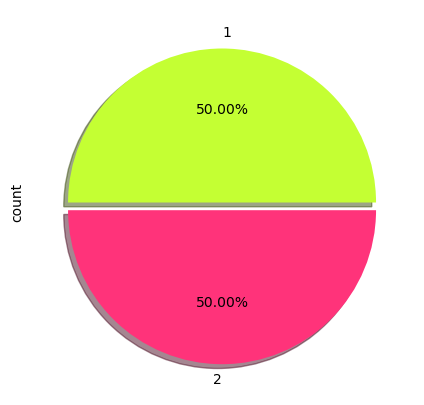

In [26]:
y_resampled.value_counts().plot(kind = 'pie', autopct = '%0.2f%%', figsize = [5,5], explode = [0,0.05],
                                       colors = ['#C4FF33', '#FF337A'], shadow = True)

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X_resampled,y_resampled,test_size=0.25, random_state=1)
     

In [28]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_fit = sc.fit(x_train)

In [29]:
x_train_sc = sc_fit.transform(x_train)
x_test_sc = sc_fit.transform(x_test)

In [30]:
x_train_sc_df = pd.DataFrame(x_train_sc, columns=x_train.columns)
x_test_sc_df = pd.DataFrame(x_test_sc, columns=x_test.columns)

In [31]:
x_train_sc_df

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0      -0.006374      0.620793        0.041175  -0.118865        -0.927178   
1      -0.162925     -0.949544       -0.230886  -0.252097        -0.938247   
2      -0.991228      0.564542       -0.983686  -0.927836        -0.120642   
3      -0.282474      0.749702       -0.337488  -0.362398        -0.356774   
4      -1.373499     -0.021405       -1.369758  -1.171370         0.376709   
..           ...           ...             ...        ...              ...   
313     1.026870     -0.312034        1.025289   0.972245         1.291718   
314    -0.732205      1.900501       -0.763073  -0.720296        -0.721301   
315     1.846633      0.114535        1.757921   1.991079        -0.033569   
316    -0.009220      0.351258        0.083158  -0.154568         0.598082   
317    -0.971303      2.188787       -1.017437  -0.905776        -1.682798   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            0.401651        0.010633            -0.487253      -1.389197   
1           -0.934539       -0.838459            -0.692557      -0.438562   
2           -0.519698       -0.676332            -0.870642       0.716825   
3           -0.780800       -0.908840            -0.822427      -0.621377   
4           -1.041723       -1.196784            -1.249962      -1.769451   
..                ...             ...                  ...            ...   
313          0.681339        0.944432             1.292045       0.943515   
314         -0.915592       -0.985127            -0.839536       0.073318   
315          0.121962        0.693073             1.538306      -1.023568   
316          1.372441        0.508324             0.821039       1.528522   
317         -1.356237       -0.166584            -0.187615      -1.970255   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                 -0.213262  ...     -0.310486       0.098568   
1                 -0.567779  ...     -0.273825      -0.836326   
2                  0.363361  ...     -1.015178       0.261230   
3                 -0.705884  ...     -0.336963       0.397603   
4                  0.844593  ...     -1.239213      -0.062450   
..                      ...  ...           ...            ...   
313                0.018811  ...      0.732296      -0.417349   
314               -0.852531  ...     -0.693382       1.094255   
315               -0.905211  ...      1.766930       0.887231   
316                0.893001  ...      0.125364       1.074538   
317               -1.131589  ...     -1.035545       1.910849   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0          -0.187594   -0.391021         -1.388202           0.246850   
1          -0.325814   -0.362180         -0.649760          -0.895776   
2          -1.013979   -0.909987         -1.121664          -0.580200   
3          -0.432274   -0.397489         -0.558001          -0.737988   
4          -1.278363   -1.033218         -0.121053          -1.077203   
..               ...         ...               ...                ...   
313         0.671141    0.635898         -0.278354          -0.273554   
314        -0.736360   -0.681006         -1.322660          -1.062139   
315         1.644570    1.861210          0.106160           0.205170   
316         0.297650   -0.105407          0.792169           2.314176   
317        -1.090735   -0.904743         -1.822092          -1.314124   

     concavity_worst  concave points_worst  symmetry_worst  \
0           0.271512             -0.282045       -1.116285   
1          -0.932661             -0.834137       -0.363341   
2          -0.721162             -0.993764        0.352519   
3          -0.964836             -0.876960       -0.497162   
4          -1.364224             -1.612623       -1.638670   
..               ...                   ...             ...   
313        -0.220093              0.055626        0

In [32]:
x_test_sc_df

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0      -0.658199     -0.237033       -0.720680  -0.678208        -1.045244   
1      -1.465153      0.229381       -1.452077  -1.244226         0.524291   
2      -0.692356      0.114535       -0.747845  -0.694753        -1.266617   
3       2.105655      0.437978        2.132469   2.275540         0.664494   
4      -1.389439     -1.099547       -1.301023  -1.154824         0.730906   
..           ...           ...             ...        ...              ...   
101     1.300124      0.576261        1.321635   1.306051        -0.890283   
102    -0.382098     -1.235487       -0.438328  -0.424805        -1.752162   
103    -0.629735     -0.551101       -0.572918  -0.668339         0.598082   
104     2.532615      0.993456        2.457626   3.044745         0.708769   
105    -0.763516     -2.133064       -0.792296  -0.741195        -0.632752   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           -1.240031       -1.185134            -1.234460      -1.078413   
1           -0.595665       -1.009635            -1.065836      -0.427593   
2           -1.269624       -0.983116            -0.996883      -0.347155   
3            1.527623        1.794027             2.435213      -0.036370   
4            0.887046        3.137391             0.581000       2.610784   
..                ...             ...                  ...            ...   
101          0.578486        0.117460             0.299744      -0.244779   
102         -1.086112       -0.872769            -0.769287      -1.637825   
103          0.376389       -0.309725            -0.730144      -0.083902   
104          0.316842        1.618075             2.199321      -0.135090   
105         -1.052369       -0.955090            -0.990144      -0.851723   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                 -0.500862  ...     -0.744299       0.294091   
1                  0.857407  ...     -1.343084       0.803435   
2                 -0.882430  ...     -0.746336       1.013745   
3                 -0.223229  ...      2.170193      -0.142960   
4                  3.199154  ...     -1.218846      -1.179723   
..                      ...  ...           ...            ...   
101               -1.093147  ...      1.294420       0.885588   
102               -1.393561  ...     -0.131258      -0.709811   
103                1.146431  ...     -0.840023      -0.617800   
104               -1.125894  ...      2.783235       0.667062   
105               -1.076062  ...     -0.652648      -1.072924   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0          -0.816058   -0.721733         -0.531784          -1.102271   
1          -1.330710   -1.095095          0.892667          -0.650460   
2          -0.814587   -0.715615         -0.964363          -1.113584   
3           2.432723    2.219539         -0.217181           0.671985   
4          -1.212781   -1.008047         -0.225920           0.009274   
..               ...         ...               ...                ...   
101         1.591634    1.277395         -0.094836           1.693740   
102        -0.228766   -0.221296         -1.475592          -0.904112   
103        -0.666662   -0.771550          0.464458          -0.075872   
104         2.650348    3.406396          0.748474          -0.046696   
105        -0.724597   -0.642726          0.132377          -0.703453   

     concavity_worst  concave points_worst  symmetry_worst  \
0          -1.289939             -1.366737       -0.639045   
1          -1.015842             -0.977801       -0.116660   
2          -0.919413             -0.837514       -0.413323   
3           0.789141              1.754726       -0.337545   
4           2.426250              0.433204        0.254169   
..               ...                   ...             ...   
101         0.367562              0.643481        0

# support vector machine

In [33]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
svm_class = svm.SVC()

In [34]:

from sklearn.model_selection import GridSearchCV

params = {"kernel":['linear', 'poly', 'rbf'],
       "degree":[1,2,3,4],
       "gamma":[0.1, 1,.001],
       "C":[0.001, 0.01, 0.1, 1, 10, 100]}

sv = svm.SVC()
svm_rs = GridSearchCV(svm_class, params, cv=10, n_jobs=-1, verbose=True)
svm_rs.fit(x_train_sc_df, y_train)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'degree': [1, 2, 3, 4], 'gamma': [0.1, 1, 0.001],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=True)

In [35]:

svm_rs.best_params_

{'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': 'linear'}

In [36]:
best_svm = svm.SVC(kernel= 'linear', degree= 1, gamma= 0.1,C= 10, probability=True)
best_svm.fit(x_train_sc_df, y_train)

SVC(C=10, degree=1, gamma=0.1, kernel='linear', probability=True)

In [37]:
best_svm.score(x_train_sc_df, y_train)

0.9874213836477987

In [38]:
pred_train = best_svm.predict(x_train_sc_df)
test_pred = best_svm.predict(x_test_sc_df)

In [39]:
from sklearn import metrics 
print(metrics.classification_report(y_train, pred_train))


              precision    recall  f1-score   support

           1       0.98      0.99      0.99       163
           2       0.99      0.98      0.99       155

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318



In [40]:
model_report = pd.DataFrame(columns=['Model', 'Precision Score', 'Recall Score', 'F1 Score', 'Accuracy Score'])
# Assuming model_report is your existing DataFrame
tmp = pd.DataFrame({'Model': 'SVM',
                   'Precision Score': metrics.precision_score(y_test, test_pred),
                   'Recall Score': metrics.recall_score(y_test, test_pred),
                   'F1 Score' : metrics.f1_score(y_test, test_pred),
                   'Accuracy Score': metrics.accuracy_score(y_test, test_pred)},
                   index=[0])

# Use pd.concat instead of append
model_SVM_report = pd.concat([model_report, tmp], ignore_index=True)

model_SVM_report


C:\Users\gowth\AppData\Local\Temp\ipykernel_19148\2537461961.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_SVM_report = pd.concat([model_report, tmp], ignore_index=True)


Model  Precision Score  Recall Score  F1 Score  Accuracy Score
0   SVM         0.957447      0.918367    0.9375        0.943396

In [41]:
# Create a dictionary of the new input values
input_data = {
    'radius_mean': 13.54,
    'texture_mean': 14.35,
    'perimeter_mean': 87.46,
    'area_mean': 566.3,
    'smoothness_mean': 0.09779,
    'compactness_mean': 0.08,
    'concavity_mean': 0.06,
    'concave points_mean': 0.04,
    'symmetry_mean': 0.1885,
    'fractal_dimension_mean':0.05766,
    'radius_se':0.2699,
    'texture_se': 0.7886,
    'perimeter_se': 2.058,
    'area_se': 23.56,
    'smoothness_se': 0.008462,
    'compactness_se': 0.0146,
    'concavity_se': 0.02387,
    'concave points_se': 0.01315,
    'symmetry_se': 0.0198,
    'fractal_dimension_se': 0.0023,
    'radius_worst':15.11,
    'texture_worst': 19.26,
    'perimeter_worst': 99.7,
    'area_worst': 711.2,
    'smoothness_worst': 0.144,
    'compactness_worst': 0.177,
    'concavity_worst': 0.3,
    'concave points_worst': 0.15,
    'symmetry_worst': 0.3,
    'fractal_dimension_worst': 0.08
}

# Convert the input data into a DataFrame
input_df = pd.DataFrame([input_data])

# If you used scaling (e.g., StandardScaler), scale the input data
input_scaled = sc.transform(input_df)  # Assuming 'scaler' is defined

# Make the prediction
prediction = best_svm.predict(input_scaled)

# Get the predicted class
if prediction[0] == 1:
    result = "Benign"
else:
    result = "Malignant"

print(f"The predicted diagnosis is: {result}")

The predicted diagnosis is: Benign


# stacked ensamble with 2 models

In [42]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
]
model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
model.fit(x_train_sc_df, y_train)


StackingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                               ('svm', SVC(probability=True, random_state=42))],
                   final_estimator=LogisticRegression())

In [43]:
model.score(x_train_sc_df, y_train)

0.9874213836477987

In [44]:
pred_train_stack = model.predict(x_train_sc_df)
pred_test_stack = model.predict(x_test_sc_df)

In [45]:
print(metrics.classification_report(y_train, pred_train_stack))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       163
           2       1.00      0.97      0.99       155

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318



In [46]:
import pandas as pd

# Assuming model_report is your existing DataFrame
tmp2 = pd.DataFrame({'Model': 'Stacked ensample with two base',
                   'Precision Score': metrics.precision_score(y_test, pred_test_stack),
                   'Recall Score': metrics.recall_score(y_test, pred_test_stack),
                   'F1 Score' : metrics.f1_score(y_test, pred_test_stack),
                   'Accuracy Score': metrics.accuracy_score(y_test, pred_test_stack)},
                   index=[0])

# Use pd.concat instead of append
model_stack_report = pd.concat([model_report, tmp2], ignore_index=True)

model_stack_report


C:\Users\gowth\AppData\Local\Temp\ipykernel_19148\397713728.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_stack_report = pd.concat([model_report, tmp2], ignore_index=True)


Model  Precision Score  Recall Score  F1 Score  \
0  Stacked ensample with two base         0.978261      0.918367  0.947368   

   Accuracy Score  
0         0.95283

In [47]:
rf_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'class_weight': ['balanced', None]
}

svc_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'probability': [True]
}

knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 100, 50)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [200, 300, 500],
    'batch_size': ['auto', 64, 128],
    'early_stopping': [True, False]
}


# stacked ensamble with 4 models

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('mlp', MLPClassifier(random_state=42))
]

stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

# Example grid search
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10],
    'svm__C': [1, 10],
    'knn__n_neighbors': [3, 5],
    'mlp__hidden_layer_sizes': [(50,), (100,)]
}

grid_search = GridSearchCV(estimator=stack_model, param_grid=param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(x_train_sc_df, y_train)


GridSearchCV(cv=5,
             estimator=StackingClassifier(estimators=[('rf',
                                                       RandomForestClassifier(random_state=42)),
                                                      ('svm',
                                                       SVC(probability=True,
                                                           random_state=42)),
                                                      ('knn',
                                                       KNeighborsClassifier()),
                                                      ('mlp',
                                                       MLPClassifier(random_state=42))],
                                          final_estimator=LogisticRegression()),
             param_grid={'knn__n_neighbors': [3, 5],
                         'mlp__hidden_layer_sizes': [(50,), (100,)],
                         'rf__max_depth': [None, 10],
                         'rf__n_estimators': [100, 200], 'svm__C': [1, 10]},
             scoring='f1_weighted')

In [49]:
grid_search.fit(x_train_sc_df, y_train)


GridSearchCV(cv=5,
             estimator=StackingClassifier(estimators=[('rf',
                                                       RandomForestClassifier(random_state=42)),
                                                      ('svm',
                                                       SVC(probability=True,
                                                           random_state=42)),
                                                      ('knn',
                                                       KNeighborsClassifier()),
                                                      ('mlp',
                                                       MLPClassifier(random_state=42))],
                                          final_estimator=LogisticRegression()),
             param_grid={'knn__n_neighbors': [3, 5],
                         'mlp__hidden_layer_sizes': [(50,), (100,)],
                         'rf__max_depth': [None, 10],
                         'rf__n_estimators': [100, 200], 'svm__C': [1, 10]},
             scoring='f1_weighted')

In [50]:
from sklearn.metrics import classification_report, accuracy_score

best_model = grid_search.best_estimator_

best_model.score(x_train_sc_df, y_train)


0.9937106918238994

In [51]:
pred_train_st = best_model.predict(x_train_sc_df)
pred_test_st = best_model.predict(x_test_sc_df)

In [52]:
print(metrics.classification_report(y_train, pred_train_st))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99       163
           2       1.00      0.99      0.99       155

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318



In [53]:


# Assuming model_report is your existing DataFrame
tmp3 = pd.DataFrame({'Model': 'stackedclassifer with 4 base',
                   'Precision Score': metrics.precision_score(y_test, pred_test_st),
                   'Recall Score': metrics.recall_score(y_test, pred_test_st),
                   'F1 Score' : metrics.f1_score(y_test, pred_test_st),
                   'Accuracy Score': metrics.accuracy_score(y_test, pred_test_st)},
                   index=[0])

# Use pd.concat instead of append
model_st_report = pd.concat([model_report, tmp3], ignore_index=True)

model_st_report


C:\Users\gowth\AppData\Local\Temp\ipykernel_19148\2363882205.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_st_report = pd.concat([model_report, tmp3], ignore_index=True)


Model  Precision Score  Recall Score  F1 Score  \
0  stackedclassifer with 4 base         0.978261      0.918367  0.947368   

   Accuracy Score  
0         0.95283

# Adaboost classifier

In [54]:
from sklearn.ensemble import AdaBoostClassifier
param_dist2 = {'n_estimators':[50,100,150,200],
               'learning_rate':[0.5,0.7,1,1.5,2]}

fit_adaboost = AdaBoostClassifier(algorithm='SAMME.R')

cv_adaboost = GridSearchCV(fit_adaboost, cv = 5, param_grid= param_dist2, n_jobs = -1, verbose = 1)

cv_adaboost.fit(x_train_sc_df, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\gowth\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.5, 0.7, 1, 1.5, 2],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=1)

In [55]:
cv_adaboost.best_params_

{'learning_rate': 1.5, 'n_estimators': 100}

In [56]:

ABC = AdaBoostClassifier(n_estimators=100,learning_rate=1,random_state=1)
ABC.fit(x_train_sc_df, y_train)

C:\Users\gowth\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=1)

In [57]:
ABC.score(x_train_sc_df, y_train)

1.0

In [58]:
pred_train_ab = ABC.predict(x_train_sc_df)
pred_test_ab= ABC.predict(x_test_sc_df)

In [59]:
print(metrics.classification_report(y_train, pred_train_ab))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       163
           2       1.00      1.00      1.00       155

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318



In [60]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(ABC,X_resampled,y_resampled, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")


C:\Users\gowth\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\gowth\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\gowth\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\gowth\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\gow

Cross-Validation Scores: [0.90588235 0.96470588 0.97647059 0.95294118 0.98809524]
Mean CV Score: 0.9576190476190476


In [61]:
# Assuming model_report is your existing DataFrame
tmp4 = pd.DataFrame({'Model': 'Adaboostclassifier',
                   'Precision Score': metrics.precision_score(y_test, pred_test_ab),
                   'Recall Score': metrics.recall_score(y_test, pred_test_ab),
                   'F1 Score' : metrics.f1_score(y_test, pred_test_ab),
                   'Accuracy Score': metrics.accuracy_score(y_test, pred_test_ab)},
                   index=[0])

# Use pd.concat instead of append
model_ab_report = pd.concat([model_report, tmp4], ignore_index=True)

model_ab_report

C:\Users\gowth\AppData\Local\Temp\ipykernel_19148\2126993728.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_ab_report = pd.concat([model_report, tmp4], ignore_index=True)


Model  Precision Score  Recall Score  F1 Score  Accuracy Score
0  Adaboostclassifier         0.978723      0.938776  0.958333        0.962264

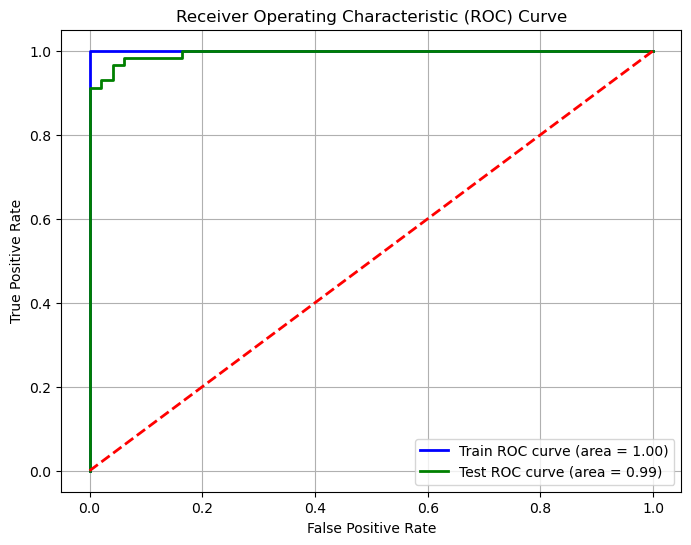

In [63]:
import matplotlib.pyplot as plt
from sklearn import metrics

# Specify the pos_label explicitly
fpr_train, tpr_train, _ = metrics.roc_curve(y_train, y_train_prob, pos_label=2)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = metrics.roc_curve(y_test, y_test_prob, pos_label=2)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

# Continue with plotting...


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (area = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (area = {roc_auc_test:.2f})')

# Plot random chance line (diagonal)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()

# Show the plot
plt.show()


In [64]:
import pandas as pd

# Assuming model_svm_report, model_stack_report, and model_st_report are DataFrames
cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score', 'F1 Score', 'Accuracy Score']
model = pd.DataFrame(columns=cols)

# Use pd.concat instead of append
model = pd.concat([model_SVM_report, model_stack_report, model_st_report,model_ab_report], ignore_index=True)

model


Model  Precision Score  Recall Score  F1 Score  \
0                             SVM         0.957447      0.918367  0.937500   
1  Stacked ensample with two base         0.978261      0.918367  0.947368   
2    stackedclassifer with 4 base         0.978261      0.918367  0.947368   
3              Adaboostclassifier         0.978723      0.938776  0.958333   

   Accuracy Score  
0        0.943396  
1        0.952830  
2        0.952830  
3        0.962264

## If your goal is to maximize performance, the AdaBoost classifier appears to be the best choice. However, if computational efficiency or model interpretability is a priority, the SVM or simpler stacked ensembles might still be worth considering.